In [1]:
#setup fastai notebook
!pip install -Uqq fastbook fastai
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.8MB/s 
     |████████████████████████████████| 194kB 16.2MB/s 
     |████████████████████████████████| 1.2MB 22.3MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
Mounted at /content/gdrive


In [2]:
# Check python version
import sys
print('Python version: ',sys.version)
#Print TF version and GPU stats
import tensorflow as tf
print('TensorFlow version:', tf.__version__)

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name), '', sep='\n')
!nvidia-smi
#install fastai
!pip install -Uqq fastai
#install pytorch
!pip install -Uqq torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
#import numpy
import numpy as np
#import torch
import torch
import torch.nn.functional as F
import torch.nn as nn

#import fastai
from fastai.imports import *
import fastai
from fastai.vision.all import *

from torchvision.models import *


Python version:  3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
TensorFlow version: 2.4.0
Found GPU at: /device:GPU:0

Sat Jan 16 15:25:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    26W /  70W |   1065MiB / 15079MiB |      3%      Default |
|                               |                      |                 ERR! |
+-------------------------------+-----------

In [ ]:

# #parameters for the data
# #use the imagewoof dataset
# WOOF = True
# #augment the data in a random basic way
# DATA_AUGMENTATION = False
# #erase parts of the images
# ERASE_AUGMENTATION = False
# #normalize the batch
# BATCH_NORMALISATION = False

In [3]:
# true for imagewoof, else imagenette
woof = True
if woof:
  path = untar_data(URLs.IMAGEWOOF)
else:
  path = untar_data(URLs.IMAGENETTE)

files = get_image_files(path/"train")
print("Training images: ", len(get_image_files(path/"train")),'(' ,round(len(get_image_files(path/"train"))*100/len(get_image_files(path)),2), '%)')
print("Validation images: ", len(get_image_files(path/"val")),'(' ,round(len(get_image_files(path/"val"))*100/len(get_image_files(path)),2), '%)')


Training images:  9025 ( 69.67 %)
Validation images:  3929 ( 30.33 %)


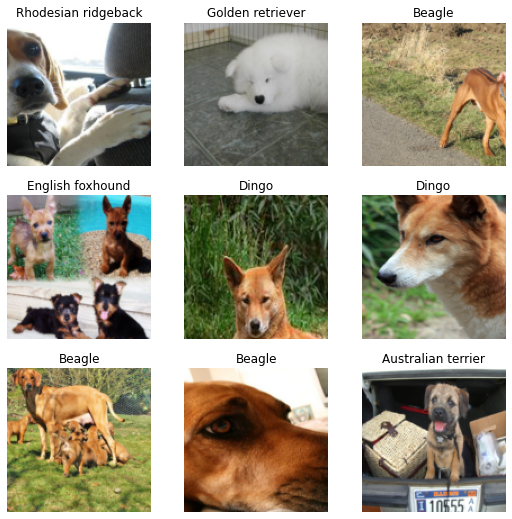

In [4]:
#get all the images
fnames = get_image_files(path)

#create dict to show better readable labels
if woof:
  lbl_dict = dict(
    n02093754='Australian terrier', 
    n02089973='Border terrier', 
    n02099601='Samoyed', 
    n02087394='Beagle', 
    n02105641='Shih-Tzu', 
    n02096294='English foxhound', 
    n02088364='Rhodesian ridgeback', 
    n02115641='Dingo', 
    n02111889='Golden retriever', 
    n02086240='Old English sheepdog'
  )
else:
  lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
  )
#function to return human readable filenames
def label_func(fname):
  return lbl_dict[parent_label(fname)]



  #define a datablock
dblock = DataBlock(
      #set input to image and the goal to ctaegories
      blocks = (ImageBlock, CategoryBlock),
      #get names inside data block
      get_items = get_image_files,
      #label the items uin a readbale manner
      get_y=label_func,
      #split between test and trainining by folder two ages above
      splitter = GrandparentSplitter(valid_name='val'),
      #randomize the input & batch transform
      item_tfms = RandomResizedCrop(128, min_scale=0.35), 
      batch_tfms = Normalize.from_stats(*imagenet_stats)
      )

  #convert to dataloader
dls = dblock.dataloaders(path)
dls.show_batch()

Learning Rate (Optimization Function)

Mounted at /content/gdrive


epoch,train_loss,valid_loss,accuracy,time
0,1.996044,2.273313,0.229829,01:26
1,1.911838,1.913905,0.348944,01:26
2,1.803199,3.146187,0.243573,01:26
3,1.675456,1.557991,0.451769,01:25
4,1.450659,2.580792,0.244846,01:25
5,1.298863,1.173162,0.590990,01:25
6,1.153963,1.602522,0.459404,01:26
7,1.027424,0.963963,0.669127,01:26
8,0.905382,1.195770,0.612879,01:26
9,0.839120,0.876339,0.709850,01:27


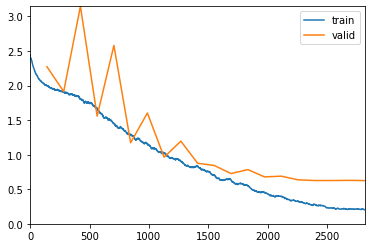

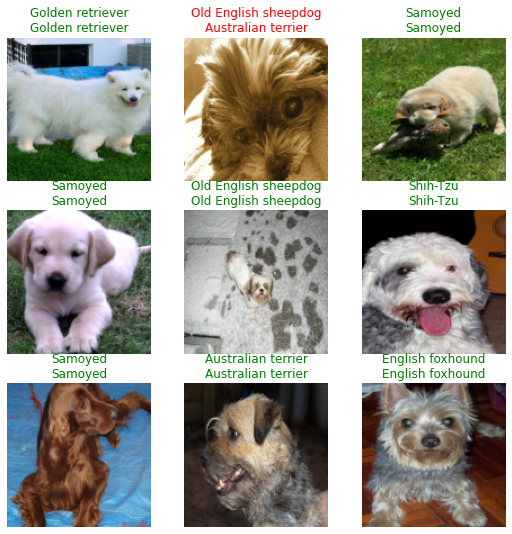

In [6]:
#test with ranger
#mount gdrive
from google.colab import drive
drive.mount('/content/gdrive')

#define the used model (here an optimized xresnet50)
model = xresnext50(n_out=10, sa=True, pool=MaxPool)

#the used optimization function, here ranger
optimizer = partial(ranger, mom=.95, sqr_mom=.99, eps=1e-6)

#additional model callbacks
callbacks = []

#the Learning Rate
LEARNING_RATE = 8e-3
EPOCHS = 20

#add teh csv logger
callbacks.extend([CSVLogger(fname='ranger1_logs.csv'),ShowGraphCallback()])
#define the learner
learn = Learner(dls, model, opt_func=optimizer, metrics=accuracy, cbs=callbacks, path= '/content/gdrive/MyDrive/Files')

#learn = Learner(dls, model, opt_func=optimizer, metrics=[accuracy,lambda i,t: top_k_accuracy(i,t,k=3), lambda i,t: top_k_accuracy(i,t,k=2)], cbs=callbacks, path= '/gdrive/MyDrive/Files')

#do the train
learn.fit_one_cycle(EPOCHS, LEARNING_RATE)
#print the results
learn.show_results()


#Ranger with Top-K Accuracy

Mounted at /content/gdrive


epoch,train_loss,valid_loss,accuracy,,,time
0,2.015038,2.074468,0.279969,0.602189,0.463222,01:25
1,1.932925,1.952285,0.344617,0.692288,0.547977,01:27
2,1.827754,4.540872,0.186816,0.447188,0.335963,01:26
3,1.685296,1.732556,0.437516,0.756681,0.640621,01:26
4,1.484638,1.956003,0.324001,0.649275,0.520234,01:25
5,1.314298,1.127951,0.603207,0.873759,0.798422,01:25
6,1.138097,2.164912,0.444388,0.771952,0.645202,01:26
7,0.997514,0.950496,0.674472,0.903792,0.838890,01:26
8,0.904953,1.154731,0.636549,0.874777,0.806821,01:26
9,0.799619,0.762777,0.740901,0.924408,0.870450,01:26


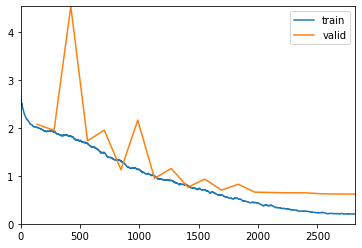

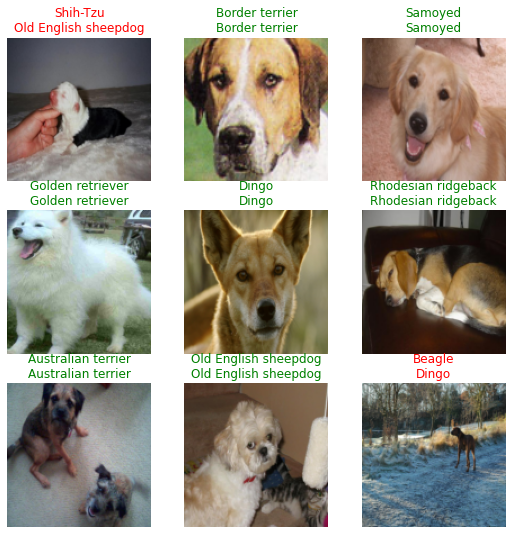

In [8]:
#test with ranger
#mount gdrive
from google.colab import drive
drive.mount('/content/gdrive')

#define the used model (here an optimized xresnet50)
model = xresnext50(n_out=10, sa=True, pool=MaxPool)

#the used optimization function, here ranger
optimizer = partial(ranger, mom=.95, sqr_mom=.99, eps=1e-6)

#additional model callbacks
callbacks = []

#the Learning Rate
LEARNING_RATE = 8e-3
EPOCHS = 20

#add teh csv logger
callbacks.extend([CSVLogger(fname='top-k_ranger1_logs.csv'),ShowGraphCallback()])

#define the learner
learn = Learner(dls, model, opt_func=optimizer, metrics=[accuracy,lambda i,t: top_k_accuracy(i,t,k=3), lambda i,t: top_k_accuracy(i,t,k=2)], cbs=callbacks, path= '/content/gdrive/MyDrive/Files')

#do the train
learn.fit_one_cycle(EPOCHS, LEARNING_RATE)
#print the results
learn.show_results()


#EarlyStopping Callback

epoch,train_loss,valid_loss,accuracy,time
0,1.999906,2.034877,0.290405,01:27
1,1.907433,1.846465,0.346144,01:26
2,1.824355,2.320219,0.271825,01:26
3,1.646101,1.455072,0.484602,01:26
4,1.530459,1.816552,0.339272,01:25
5,1.401934,1.309425,0.547722,01:25
6,1.237050,1.671150,0.460677,01:26
7,1.173916,1.261270,0.583864,01:26
8,1.064517,1.215989,0.583100,01:27
9,0.943331,0.996329,0.669636,01:27


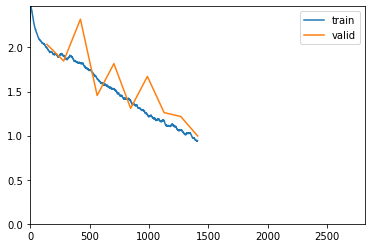

No improvement since epoch 0: early stopping


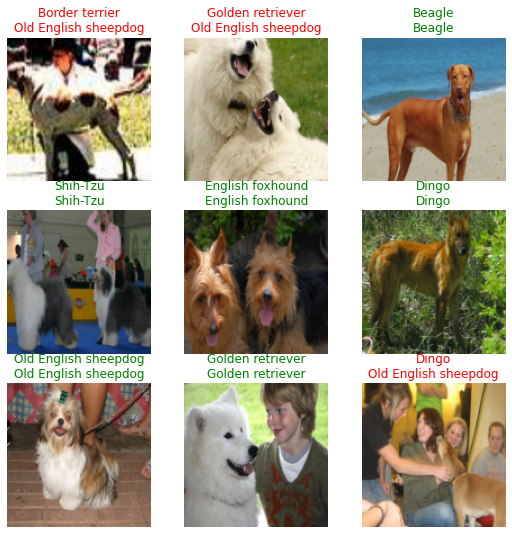

In [21]:
#test with ranger
#mount gdrive
from google.colab import drive
#drive.mount('/content/gdrive')

#define the used model (here an optimized xresnet50)
model = xresnext50(n_out=10, sa=True, pool=MaxPool)

#the used optimization function, here ranger
optimizer = partial(ranger, mom=.95, sqr_mom=.99, eps=1e-6)

#additional model callbacks
callbacks = [EarlyStoppingCallback(monitor='accuracy', min_delta=0.9, patience=10)]

#the Learning Rate
LEARNING_RATE = 8e-3
EPOCHS = 20

#add teh csv logger
callbacks.extend([CSVLogger(fname='ranger1_with_Earlystopping_logs.csv'),ShowGraphCallback(),])
#define the learner
learn = Learner(dls, model, wd=0.3, opt_func=optimizer, metrics=accuracy, cbs=callbacks, path= '/content/gdrive/MyDrive/Files')

#do the train
learn.fit_one_cycle(EPOCHS, LEARNING_RATE)
#print the results
learn.show_results()


#Early Stopping with Top_K Accuracy

epoch,train_loss,valid_loss,accuracy,,,time
0,2.007076,2.023359,0.282769,0.609824,0.465767,01:27
1,1.897545,1.793554,0.379995,0.706032,0.578773,01:27
2,1.781625,2.327523,0.332400,0.681089,0.544159,01:27
3,1.629279,1.589362,0.462204,0.773479,0.667345,01:27
4,1.468948,2.061053,0.373377,0.722830,0.603970,01:27
5,1.266838,1.173012,0.593281,0.871723,0.787732,01:27
6,1.141424,1.647716,0.484347,0.742683,0.645966,01:27
7,1.024532,0.945342,0.678035,0.905828,0.841690,01:28
8,0.907154,1.231511,0.590481,0.845253,0.755918,01:26


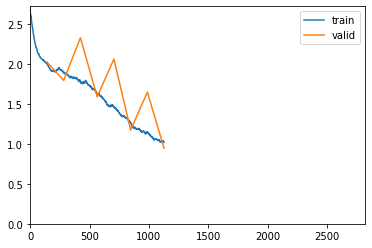

No improvement since epoch 0: early stopping


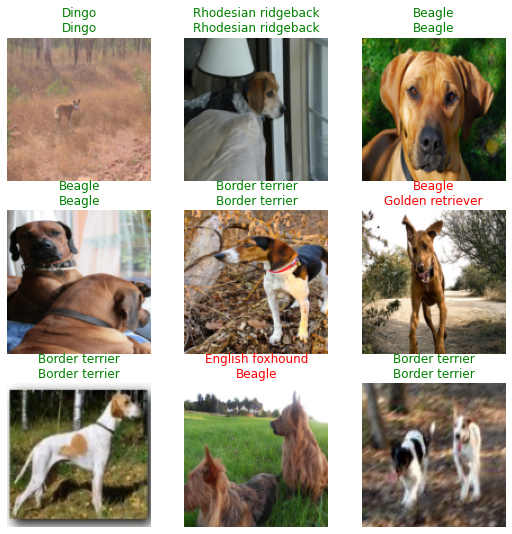

In [23]:
#test with adam
#mount gdrive
from google.colab import drive
#drive.mount('/content/gdrive')

#define the used model (here an optimized xresnet50)
model = xresnext50(n_out=10, sa=True, pool=MaxPool)

#the used optimization function, here ranger
optimizer = partial(ranger, mom=.95, sqr_mom=.99, eps=1e-6)

callbacks = [EarlyStoppingCallback(monitor='accuracy', min_delta=0.9,patience=8)]

#add teh csv logger
callbacks.extend([CSVLogger(fname='adam_with_Earlystopping_logs_7e-4.csv'),ShowGraphCallback()])
#define the learner
#learn = Learner(dls, model, wd=0.3, opt_func=optimizer, metrics=[accuracy, top_k_accuracy], cbs=callbacks, path= '/content/gdrive/MyDrive/Files')
learn = Learner(dls, model, opt_func=optimizer, metrics=[accuracy,lambda i,t: top_k_accuracy(i,t,k=3), lambda i,t: top_k_accuracy(i,t,k=2)], cbs=callbacks, path= '/content/gdrive/MyDrive/Files')

#do the train
learn.fit_one_cycle(20, 8e-3)
#print the results
learn.show_results()
